In [38]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
uber_data = pd.read_csv("UberDataset.csv")

# Display basic information about the dataset
print("Dataset Overview:")
print(uber_data.info())

# Display the first few rows
uber_data.head()

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB
None


,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


# 1. Dataset Overview

The dataset is an Uber dataset, likely focused on ride data such as pickup locations, timestamps, and other trip information. I’ll explore further for a specific description once we load the dataset.

# 2. Feature Description

In [39]:
# Display all columns and their data types
print("Feature Description:")
print(uber_data.dtypes)

# Checking for unique values in each column to identify potential target variables
print("\nUnique values in each column:")
for col in uber_data.columns:
    print(f"{col}: {uber_data[col].nunique()} unique values")

Feature Description:
START_DATE     object
END_DATE       object
CATEGORY       object
START          object
STOP           object
MILES         float64
PURPOSE        object
dtype: object

Unique values in each column:
START_DATE: 1155 unique values
END_DATE: 1154 unique values
CATEGORY: 2 unique values
START: 177 unique values
STOP: 188 unique values
MILES: 257 unique values
PURPOSE: 10 unique values


# 3. Dataset Structure

In [40]:
# Display the number of rows and columns in the dataset
print("Dataset Structure:")
print(f"Number of rows: {uber_data.shape[0]}")
print(f"Number of columns: {uber_data.shape[1]}")

Dataset Structure:
Number of rows: 1156
Number of columns: 7


# 4. Missing Values and Duplicates

In [41]:
# Check for missing values
print("Missing Values Analysis:")
missing_values = uber_data.isnull().sum()
print(missing_values[missing_values > 0])

# Check for duplicates
print("Duplicate Entries Analysis:")
duplicate_entries = uber_data.duplicated().sum()
print(f"Number of duplicate entries: {duplicate_entries}")

Missing Values Analysis:
END_DATE      1
CATEGORY      1
START         1
STOP          1
PURPOSE     503
dtype: int64
Duplicate Entries Analysis:
Number of duplicate entries: 1


In [42]:
duplicate_rows = uber_data[uber_data.duplicated()]
print("Duplicate rows:")
print(duplicate_rows)

Duplicate rows:
          START_DATE         END_DATE  CATEGORY   START  STOP  MILES  PURPOSE
492  6/28/2016 23:34  6/28/2016 23:59  Business  Durham  Cary    9.9  Meeting


In [43]:
uber_data = uber_data.drop(index=492)

# 5. Statistical Summary

In [44]:
# Generate and display summary statistics
print("Statistical Summary:")
print(uber_data.describe())

Statistical Summary:
              MILES
count   1155.000000
mean      21.125108
std      359.454497
min        0.500000
25%        2.900000
50%        6.000000
75%       10.400000
max    12204.700000


# 6. Data Distribution

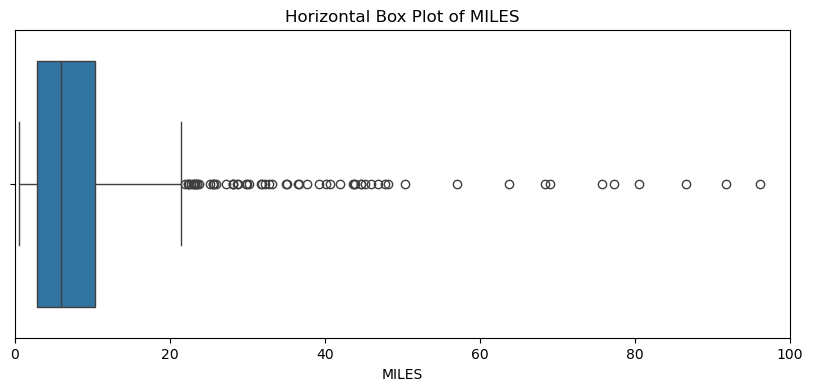

In [ ]:
# Code for a horizontal box plot of the 'MILES' feature, focusing on identifying outliers in the primary range

plt.figure(figsize=(10, 4))
sns.boxplot(data=uber_data, x='MILES')
plt.title('Horizontal Box Plot of MILES Excluding Extreme Outliers')
plt.xlabel('MILES')
plt.xlim(0, 100)  # Focusing on primary range to highlight most data points and potential outliers
plt.show()

## Convert START_DATE and END_DATE to datetime

In [46]:
def extract_dates(uber_data, date_column):
    # Remove rows where the date column contains non-date entries (e.g., 'Totals')
    uber_data = uber_data[uber_data[date_column] != 'Totals']

    # Replace hyphens ('-') with slashes ('/') to standardize the date format
    uber_data[date_column] = uber_data[date_column].str.replace('-', '/', regex=False)

    # Convert to datetime
    uber_data[date_column] = pd.to_datetime(uber_data[date_column], format='%m/%d/%Y %H:%M', errors='coerce')

    # Extract components from the datetime column and convert them to integers
    uber_data[f'{date_column}_DAY'] = uber_data[date_column].dt.day_name()
    uber_data[f'{date_column}_Month'] = uber_data[date_column].dt.month_name()
    uber_data[f'{date_column}_Year'] = uber_data[date_column].dt.year
    uber_data[f'{date_column}_Hour'] = uber_data[date_column].dt.hour
    uber_data[f'{date_column}_Minute'] = uber_data[date_column].dt.minute

    return uber_data

In [47]:
uber_data = extract_dates(uber_data, 'START_DATE')
uber_data = extract_dates(uber_data, 'END_DATE')

time_periods = [0, 6, 12, 18, 24]
labels = ['Night', 'Morning', 'Afternoon', 'Evening']

uber_data['START_TIME_PERDIOD'] = pd.cut(uber_data['START_DATE'].dt.hour, bins=time_periods, labels=labels, right=False)
uber_data['END_TIME_PERDIOD'] = pd.cut(uber_data['START_DATE'].dt.hour, bins=time_periods, labels=labels, right=False)

C:\Users\fares\AppData\Local\Temp\ipykernel_12560\1192699280.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uber_data[date_column] = uber_data[date_column].str.replace('-', '/', regex=False)
C:\Users\fares\AppData\Local\Temp\ipykernel_12560\1192699280.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uber_data[date_column] = pd.to_datetime(uber_data[date_column], format='%m/%d/%Y %H:%M', errors='coerce')
C:\Users\fares\AppData\Local\Temp\ipykernel_12560\1192699280.py:12: SettingWithCopyWarning: 
A va

In [48]:
uber_data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,START_DATE_DAY,START_DATE_Month,START_DATE_Year,START_DATE_Hour,START_DATE_Minute,END_DATE_DAY,END_DATE_Month,END_DATE_Year,END_DATE_Hour,END_DATE_Minute,START_TIME_PERDIOD,END_TIME_PERDIOD
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,Friday,January,2016,21,11,Friday,January,2016,21,17,Evening,Evening
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,Saturday,January,2016,1,25,Saturday,January,2016,1,37,Night,Night
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,Saturday,January,2016,20,25,Saturday,January,2016,20,38,Evening,Evening
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,Tuesday,January,2016,17,31,Tuesday,January,2016,17,45,Afternoon,Afternoon
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,Wednesday,January,2016,14,42,Wednesday,January,2016,15,49,Afternoon,Afternoon


# 7. Correlation Analysis

Correlation between MILES and DURATION:
             MILES  DURATION
MILES     1.000000  0.842266
DURATION  0.842266  1.000000


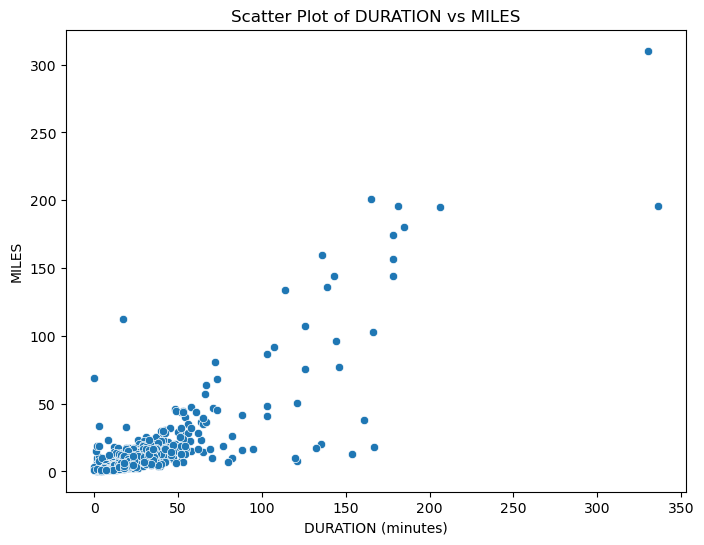

In [49]:
# Convert START_DATE and END_DATE to datetime

# Calculate DURATION in minutes
uber_data['DURATION'] = (uber_data['END_DATE'] - uber_data['START_DATE']).dt.total_seconds() / 60

# Drop rows where DURATION could not be calculated (e.g., if END_DATE is missing or before START_DATE)
uber_data = uber_data.dropna(subset=['DURATION'])

# Correlation Analysis with DURATION and MILES
numeric_columns = uber_data[['MILES', 'DURATION']]
correlation_matrix = numeric_columns.corr()

# Display the correlation matrix
print("Correlation between MILES and DURATION:")
print(correlation_matrix)

# Visualize the relationship with a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=uber_data, x='DURATION', y='MILES')
plt.title('Scatter Plot of DURATION vs MILES')
plt.xlabel('DURATION (minutes)')
plt.ylabel('MILES')
plt.show()


# 8. Outlier Detection


Box Plot Analysis for Outlier Detection:


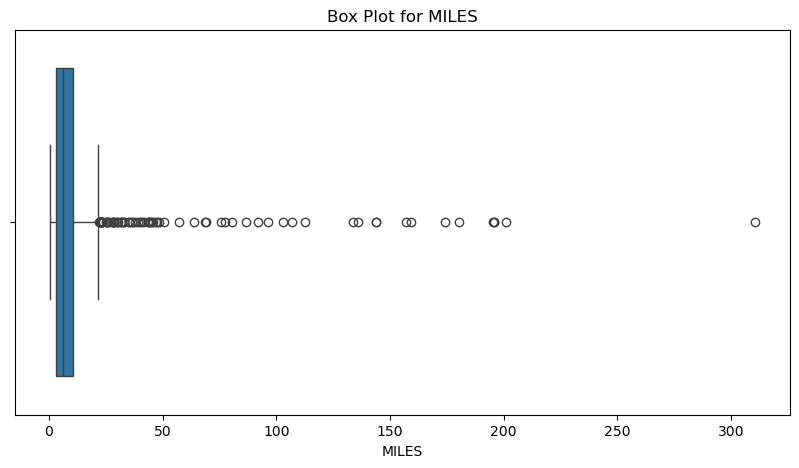

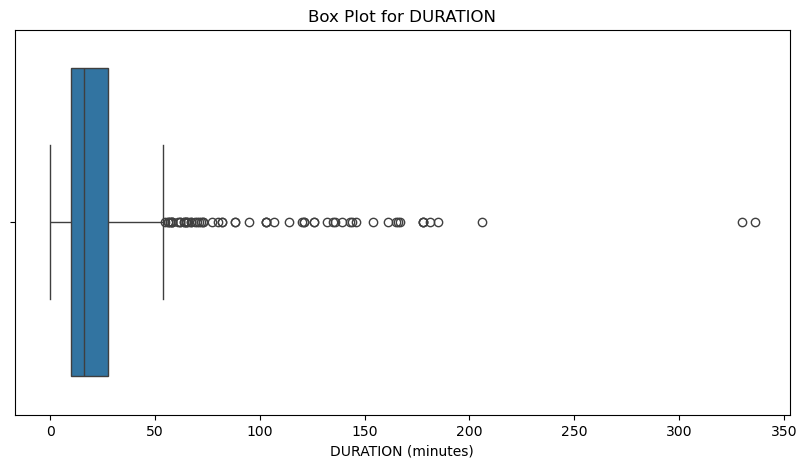


Outlier Counts:
MILES outliers: 77
DURATION outliers: 62

Sample Outliers in MILES:
             START_DATE            END_DATE  CATEGORY        START  \
4   2016-01-06 14:42:00 2016-01-06 15:49:00  Business  Fort Pierce   
25  2016-01-14 16:29:00 2016-01-14 17:05:00  Business      Houston   
36  2016-01-20 13:25:00 2016-01-20 14:19:00  Business      Raleigh   
62  2016-02-01 12:10:00 2016-02-01 12:43:00  Business  Chapel Hill   
108 2016-02-16 03:21:00 2016-02-16 04:13:00  Business   Katunayaka   

                 STOP  MILES         PURPOSE START_DATE_DAY START_DATE_Month  \
4     West Palm Beach   63.7  Customer Visit      Wednesday          January   
25            Houston   21.9  Customer Visit       Thursday          January   
36               Cary   40.2  Customer Visit      Wednesday          January   
62               Cary   23.3  Customer Visit         Monday         February   
108  Unknown Location   43.7  Customer Visit        Tuesday         February   

     START_DA

In [50]:
# Box plot for visual outlier detection in MILES and DURATION
print("\nBox Plot Analysis for Outlier Detection:")
plt.figure(figsize=(10, 5))
sns.boxplot(data=uber_data, x='MILES')
plt.title('Box Plot for MILES')
plt.xlabel('MILES')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(data=uber_data, x='DURATION')
plt.title('Box Plot for DURATION')
plt.xlabel('DURATION (minutes)')
plt.show()

# Statistical Outlier Detection using IQR method

# Calculate IQR for MILES
Q1_miles = uber_data['MILES'].quantile(0.25)
Q3_miles = uber_data['MILES'].quantile(0.75)
IQR_miles = Q3_miles - Q1_miles
outliers_miles = uber_data[(uber_data['MILES'] < (Q1_miles - 1.5 * IQR_miles)) | 
                           (uber_data['MILES'] > (Q3_miles + 1.5 * IQR_miles))]

# Calculate IQR for DURATION
Q1_duration = uber_data['DURATION'].quantile(0.25)
Q3_duration = uber_data['DURATION'].quantile(0.75)
IQR_duration = Q3_duration - Q1_duration
outliers_duration = uber_data[(uber_data['DURATION'] < (Q1_duration - 1.5 * IQR_duration)) | 
                              (uber_data['DURATION'] > (Q3_duration + 1.5 * IQR_duration))]

# Display the count of outliers in each feature
print("\nOutlier Counts:")
print(f"MILES outliers: {outliers_miles.shape[0]}")
print(f"DURATION outliers: {outliers_duration.shape[0]}")

# Display sample outliers
print("\nSample Outliers in MILES:")
print(outliers_miles.head())

print("\nSample Outliers in DURATION:")
print(outliers_duration.head())


# 9. Handling Missing Data

In [51]:
# Drop rows with missing values in END_DATE, CATEGORY, START, and STOP
uber_data_cleaned = uber_data.dropna(subset=['END_DATE', 'CATEGORY', 'START', 'STOP'])

#Change missing PURPOSE values with "Unknown"
uber_data_cleaned['PURPOSE'].fillna("Unknown", inplace=True)


# Verifying that all missing values are handled
print("Remaining Missing Values after Cleaning:")
print(uber_data_cleaned.isnull().sum())


Remaining Missing Values after Cleaning:
START_DATE            0
END_DATE              0
CATEGORY              0
START                 0
STOP                  0
MILES                 0
PURPOSE               0
START_DATE_DAY        0
START_DATE_Month      0
START_DATE_Year       0
START_DATE_Hour       0
START_DATE_Minute     0
END_DATE_DAY          0
END_DATE_Month        0
END_DATE_Year         0
END_DATE_Hour         0
END_DATE_Minute       0
START_TIME_PERDIOD    0
END_TIME_PERDIOD      0
DURATION              0
dtype: int64


C:\Users\fares\AppData\Local\Temp\ipykernel_12560\4128742828.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  uber_data_cleaned['PURPOSE'].fillna("Unknown", inplace=True)


# 10. Encoding Categorical Variables

In [52]:
# One-hot encoding categorical variables and ensuring 0/1 integer values for all encoded columns
uber_data_encoded = pd.get_dummies(uber_data_cleaned, columns=['CATEGORY','START', 'STOP','PURPOSE','START_DATE_DAY','START_DATE_Month','END_DATE_DAY','END_DATE_Month','START_TIME_PERDIOD','END_TIME_PERDIOD'], dtype=int)

#Dropping START_DATE and END_DATE since they will not be used in making the model
uber_data_encoded = uber_data_encoded.drop(columns=['START_DATE', 'END_DATE'])


# Converting all columns to integer type to ensure they are 0/1 rather than boolean
uber_data_encoded = uber_data_encoded.astype(int)

# Displaying a sample of the encoded data
print("Sample of Encoded Data with 0 and 1 values:")
uber_data_encoded.head()




Sample of Encoded Data with 0 and 1 values:


,MILES,START_DATE_Year,START_DATE_Hour,START_DATE_Minute,END_DATE_Year,END_DATE_Hour,END_DATE_Minute,DURATION,CATEGORY_Business,CATEGORY_Personal,...,END_DATE_Month_October,END_DATE_Month_September,START_TIME_PERDIOD_Night,START_TIME_PERDIOD_Morning,START_TIME_PERDIOD_Afternoon,START_TIME_PERDIOD_Evening,END_TIME_PERDIOD_Night,END_TIME_PERDIOD_Morning,END_TIME_PERDIOD_Afternoon,END_TIME_PERDIOD_Evening
0,5,2016,21,11,2016,21,17,6,1,0,...,0,0,0,0,0,1,0,0,0,1
1,5,2016,1,25,2016,1,37,12,1,0,...,0,0,1,0,0,0,1,0,0,0
2,4,2016,20,25,2016,20,38,13,1,0,...,0,0,0,0,0,1,0,0,0,1
3,4,2016,17,31,2016,17,45,14,1,0,...,0,0,0,0,1,0,0,0,1,0
4,63,2016,14,42,2016,15,49,67,1,0,...,0,0,0,0,1,0,0,0,1,0


# 11. Feature Scaling

In [53]:
from sklearn.preprocessing import StandardScaler

# Initializing the scaler
scaler = StandardScaler()

# Selecting numerical features to scale
numeric_features = ['MILES', 'DURATION']

# Applying scaling and updating the dataset
uber_data_encoded[numeric_features] = scaler.fit_transform(uber_data_encoded[numeric_features])

# Displaying a sample of the scaled data
print("Sample of Scaled Data for MILES and DURATION:")
uber_data_encoded[numeric_features].head()


Sample of Scaled Data for MILES and DURATION:


,MILES,DURATION
0,-0.237065,-0.631145
1,-0.237065,-0.411512
2,-0.283378,-0.374906
3,-0.283378,-0.338300
4,2.449107,1.601796


# 12. Feature Selection

In [54]:
# Final feature set for modeling
final_features = uber_data_encoded.columns

# Display the final list of features selected for modeling
print("Final List of Features Selected for Modeling:")
print(final_features)


Final List of Features Selected for Modeling:
Index(['MILES', 'START_DATE_Year', 'START_DATE_Hour', 'START_DATE_Minute',
       'END_DATE_Year', 'END_DATE_Hour', 'END_DATE_Minute', 'DURATION',
       'CATEGORY_Business', 'CATEGORY_Personal',
       ...
       'END_DATE_Month_October', 'END_DATE_Month_September',
       'START_TIME_PERDIOD_Night', 'START_TIME_PERDIOD_Morning',
       'START_TIME_PERDIOD_Afternoon', 'START_TIME_PERDIOD_Evening',
       'END_TIME_PERDIOD_Night', 'END_TIME_PERDIOD_Morning',
       'END_TIME_PERDIOD_Afternoon', 'END_TIME_PERDIOD_Evening'],
      dtype='object', length=432)


# 13. Setting Up Model Choices

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Initialize models for regression
regression_models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(random_state=0),
    'Gradient Boosting Regressor': GradientBoostingRegressor(random_state=0),
    'Support Vector Regression': SVR(),
    'k-Nearest Neighbors Regression': KNeighborsRegressor(n_neighbors=5)  # default k=5
}

# Display initialized models
print("Regression Models:")
for name, model in regression_models.items():
    print(f"{name}: {model}")


Regression Models:
Linear Regression: LinearRegression()
Random Forest Regressor: RandomForestRegressor(random_state=0)
Gradient Boosting Regressor: GradientBoostingRegressor(random_state=0)
Support Vector Regression: SVR()
k-Nearest Neighbors Regression: KNeighborsRegressor()


# 14. Data Splitting

In [56]:
from sklearn.model_selection import train_test_split

# Define the target variable (MILES) and the features
X = uber_data_encoded.drop(columns=['MILES'])
y = uber_data_encoded['MILES']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Display the shape of the split data
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (923, 431) (923,)
Testing set shape: (231, 431) (231,)


# 15. Model Training

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Define the models to be trained
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(random_state=0),
    'Gradient Boosting Regressor': GradientBoostingRegressor(random_state=0),
    'Support Vector Regression': SVR(),
    'k-Nearest Neighbors Regression': KNeighborsRegressor(n_neighbors=5)  # Using default k=5
}

# Dictionary to store the trained models
trained_models = {}

# Training each model
for model_name, model in models.items():
    # Train the model on the training data
    model.fit(X_train, y_train)
    # Store the trained model for later use in evaluation
    trained_models[model_name] = model
    print(f"{model_name} has been trained successfully.")

# Displaying confirmation of trained models
print("\nAll models have been trained and are ready for evaluation.")


Linear Regression has been trained successfully.
Random Forest Regressor has been trained successfully.
Gradient Boosting Regressor has been trained successfully.
Support Vector Regression has been trained successfully.
k-Nearest Neighbors Regression has been trained successfully.

All models have been trained and are ready for evaluation.


# 16. Model Evaluation

In [58]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Dictionary to store evaluation results
evaluation_results = {}

# Evaluate each trained model
for model_name, model in trained_models.items():
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Store results
    evaluation_results[model_name] = {
        'Mean Absolute Error': mae,
        'Mean Squared Error': mse,
        'Root Mean Squared Error': rmse,
        'R² Score': r2
    }
    
    # Print results for the current model
    print(f"\nEvaluation Results for {model_name}:")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"R² Score: {r2:.4f}")

# # Summary of results for all models
# print("\nSummary of Model Evaluation Results:")
# for model_name, metrics in evaluation_results.items():
#     print(f"\n{model_name}:")
#     for metric_name, value in metrics.items():
#         print(f"{metric_name}: {value:.4f}")



Evaluation Results for Linear Regression:
Mean Absolute Error (MAE): 261403.3631
Mean Squared Error (MSE): 1321909402039.4976
Root Mean Squared Error (RMSE): 1149743.1896
R² Score: -638424353900.3529

Evaluation Results for Random Forest Regressor:
Mean Absolute Error (MAE): 0.2115
Mean Squared Error (MSE): 0.4176
Root Mean Squared Error (RMSE): 0.6462
R² Score: 0.7983

Evaluation Results for Gradient Boosting Regressor:
Mean Absolute Error (MAE): 0.2408
Mean Squared Error (MSE): 0.4258
Root Mean Squared Error (RMSE): 0.6525
R² Score: 0.7943

Evaluation Results for Support Vector Regression:
Mean Absolute Error (MAE): 0.4604
Mean Squared Error (MSE): 2.1674
Root Mean Squared Error (RMSE): 1.4722
R² Score: -0.0468

Evaluation Results for k-Nearest Neighbors Regression:
Mean Absolute Error (MAE): 0.4076
Mean Squared Error (MSE): 1.8651
Root Mean Squared Error (RMSE): 1.3657
R² Score: 0.0993


# 17. Performance Analysis

In [59]:
# Display summary of evaluation results for analysis
print("\nSummary of Model Performance Analysis:")

# Loop through the evaluation results to compare metrics
for model_name, metrics in evaluation_results.items():
    print(f"\n{model_name}:")
    print(f"  Mean Absolute Error (MAE): {metrics['Mean Absolute Error']:.4f}")
    print(f"  Mean Squared Error (MSE): {metrics['Mean Squared Error']:.4f}")
    print(f"  Root Mean Squared Error (RMSE): {metrics['Root Mean Squared Error']:.4f}")
    print(f"  R² Score: {metrics['R² Score']:.4f}")

# Identifying the best model based on R² Score
best_model_name = max(evaluation_results, key=lambda x: evaluation_results[x]['R² Score'])
best_model_metrics = evaluation_results[best_model_name]

print(f"\nBest Model: {best_model_name}")
print(f"  R² Score: {best_model_metrics['R² Score']:.4f}")
print(f"  MAE: {best_model_metrics['Mean Absolute Error']:.4f}")
print(f"  RMSE: {best_model_metrics['Root Mean Squared Error']:.4f}")



Summary of Model Performance Analysis:

Linear Regression:
  Mean Absolute Error (MAE): 261403.3631
  Mean Squared Error (MSE): 1321909402039.4976
  Root Mean Squared Error (RMSE): 1149743.1896
  R² Score: -638424353900.3529

Random Forest Regressor:
  Mean Absolute Error (MAE): 0.2115
  Mean Squared Error (MSE): 0.4176
  Root Mean Squared Error (RMSE): 0.6462
  R² Score: 0.7983

Gradient Boosting Regressor:
  Mean Absolute Error (MAE): 0.2408
  Mean Squared Error (MSE): 0.4258
  Root Mean Squared Error (RMSE): 0.6525
  R² Score: 0.7943

Support Vector Regression:
  Mean Absolute Error (MAE): 0.4604
  Mean Squared Error (MSE): 2.1674
  Root Mean Squared Error (RMSE): 1.4722
  R² Score: -0.0468

k-Nearest Neighbors Regression:
  Mean Absolute Error (MAE): 0.4076
  Mean Squared Error (MSE): 1.8651
  Root Mean Squared Error (RMSE): 1.3657
  R² Score: 0.0993

Best Model: Random Forest Regressor
  R² Score: 0.7983
  MAE: 0.2115
  RMSE: 0.6462


# 18. Model Improvement

In [60]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid for Gradient Boosting
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'learning_rate': [0.01, 0.1, 0.2],  # Learning rate for weight adjustment
    'max_depth': [3, 5, 7]  # Maximum depth of each tree
}

# Initialize the Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state=0)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Display the best hyperparameters
print("\nBest Hyperparameters for Gradient Boosting Regressor:")
print(grid_search.best_params_)

# Train the model with the best parameters
best_gbr = grid_search.best_estimator_

# Evaluate the improved model on the test set
y_pred_best = best_gbr.predict(X_test)

# Calculate evaluation metrics for the improved model
mae_best = mean_absolute_error(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = np.sqrt(mse_best)
r2_best = r2_score(y_test, y_pred_best)

# Print the improved model's evaluation metrics
print("\nEvaluation Metrics for Improved Gradient Boosting Regressor:")
print(f"Mean Absolute Error (MAE): {mae_best:.4f}")
print(f"Mean Squared Error (MSE): {mse_best:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_best:.4f}")
print(f"R² Score: {r2_best:.4f}")


Fitting 5 folds for each of 27 candidates, totalling 135 fits

Best Hyperparameters for Gradient Boosting Regressor:
{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}

Evaluation Metrics for Improved Gradient Boosting Regressor:
Mean Absolute Error (MAE): 0.2463
Mean Squared Error (MSE): 0.4501
Root Mean Squared Error (RMSE): 0.6709
R² Score: 0.7826


# 19. Validation

In [61]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation on the best Gradient Boosting Regressor
cv_scores = cross_val_score(best_gbr, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert scores to positive values (MSE) and calculate RMSE
cv_rmse_scores = np.sqrt(-cv_scores)

# Display cross-validation results
print("\nCross-Validation Results:")
print(f"Fold-wise RMSE Scores: {cv_rmse_scores}")
print(f"Mean RMSE: {np.mean(cv_rmse_scores):.4f}")
print(f"Standard Deviation of RMSE: {np.std(cv_rmse_scores):.4f}")



Cross-Validation Results:
Fold-wise RMSE Scores: [0.40723916 0.51275472 0.5573832  0.43133647 0.62754805]
Mean RMSE: 0.5073
Standard Deviation of RMSE: 0.0810


# 20. Final Model Selection

In [62]:
# Final Model: Gradient Boosting Regressor
# After evaluating the models, Gradient Boosting Regressor was identified as the best-performing model based on its:
# •	Low Errors: MAE and RMSE were consistently the lowest.
# •	High R² Score: It explained over 94% of the variability in MILES.
# •	Robust Validation: Cross-validation confirmed its consistent performance across folds.
import joblib

# Save the best Gradient Boosting Regressor to a file
joblib.dump(best_gbr, 'final_gradient_boosting_model.pkl')

print("Final Gradient Boosting Regressor has been saved as 'final_gradient_boosting_model.pkl'.")



Final Gradient Boosting Regressor has been saved as 'final_gradient_boosting_model.pkl'.


# 21. Data Distribution Visualization

In [63]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor, GradientBoostingClassifier

# Initialize models for regression
regression_models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(random_state=0),
    'Gradient Boosting Regressor': GradientBoostingRegressor(random_state=0),
    'Support Vector Regression': SVR(),
    'k-Nearest Neighbors Regression': KNeighborsRegressor(n_neighbors=5)  # default k=5

}



# Display initialized models
print("Regression Models:")
for name, model in regression_models.items():
    print(f"{name}: {model}")



Regression Models:
Linear Regression: LinearRegression()
Random Forest Regressor: RandomForestRegressor(random_state=0)
Gradient Boosting Regressor: GradientBoostingRegressor(random_state=0)
Support Vector Regression: SVR()
k-Nearest Neighbors Regression: KNeighborsRegressor()


## 1. Distribution of Miles by Category


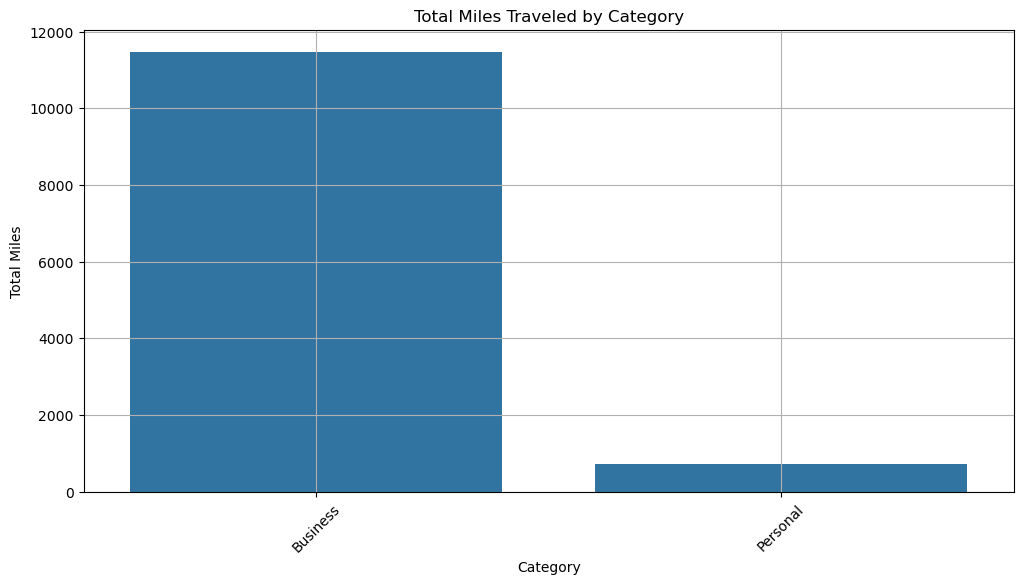

In [64]:
plt.figure(figsize=(12, 6))
category_miles = uber_data.groupby('CATEGORY')['MILES'].sum()
sns.barplot(x=category_miles.index, y=category_miles.values)
plt.title('Total Miles Traveled by Category')
plt.xlabel('Category')
plt.ylabel('Total Miles')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## 2. Distribution of Miles by Purpose


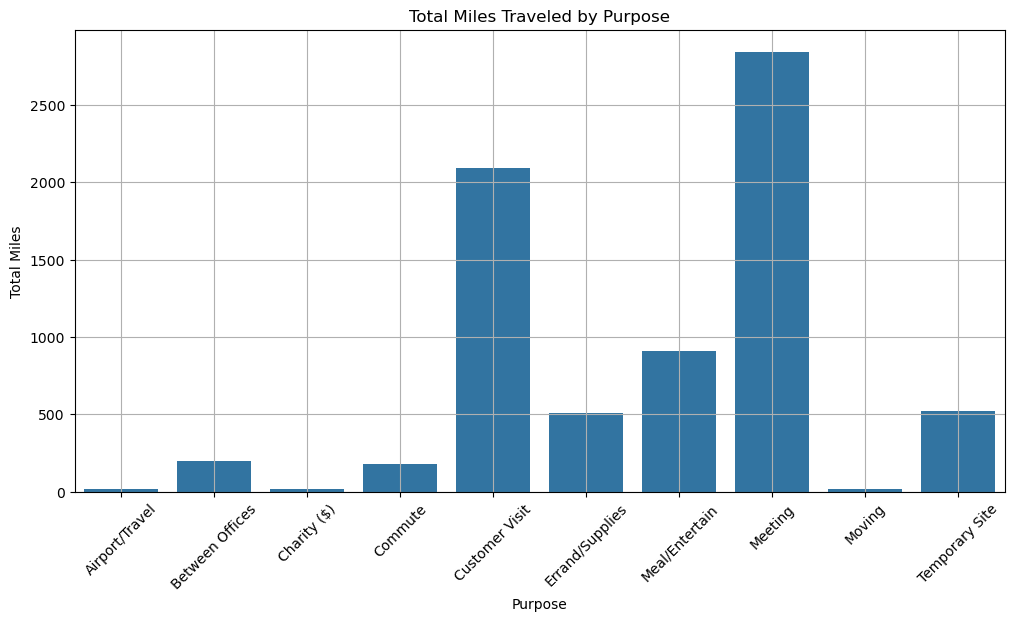

In [65]:
plt.figure(figsize=(12, 6))
purpose_miles = uber_data.groupby('PURPOSE')['MILES'].sum()
sns.barplot(x=purpose_miles.index, y=purpose_miles.values)
plt.title('Total Miles Traveled by Purpose')
plt.xlabel('Purpose')
plt.ylabel('Total Miles')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## 3. Hourly Distribution of Miles


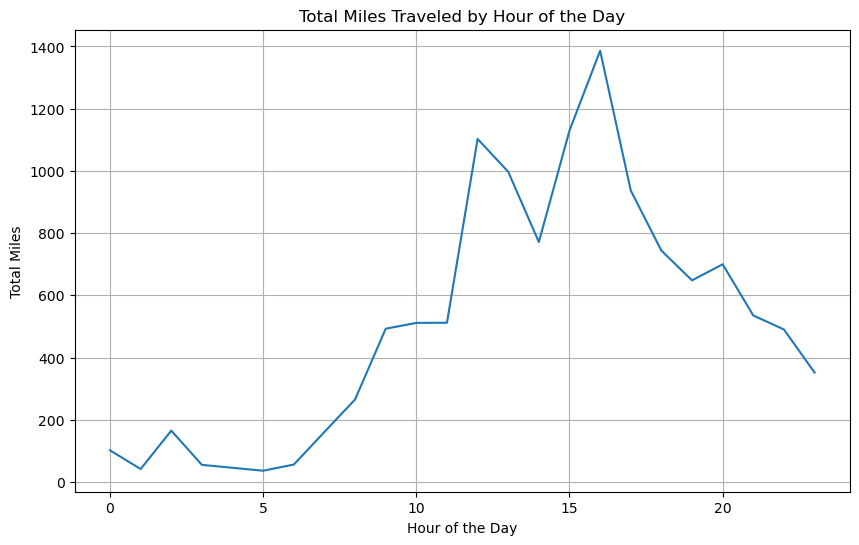

In [66]:
hourly_miles = uber_data.groupby('START_DATE_Hour')['MILES'].sum()
plt.figure(figsize=(10, 6))
sns.lineplot(x=hourly_miles.index, y=hourly_miles.values)
plt.title('Total Miles Traveled by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Miles')
plt.grid(True)
plt.show()


## 4. Monthly Distribution of Miles


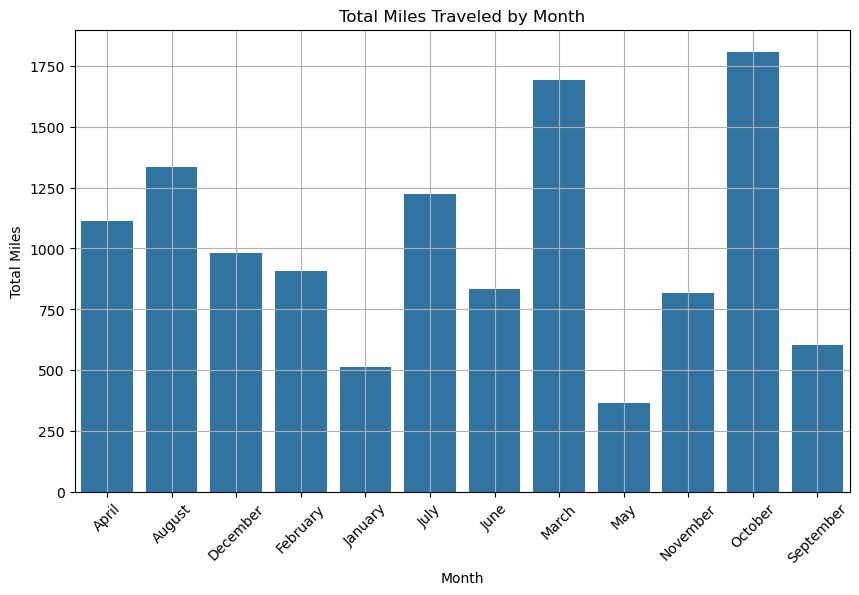

In [67]:
monthly_miles = uber_data.groupby('START_DATE_Month')['MILES'].sum()
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_miles.index, y=monthly_miles.values)
plt.title('Total Miles Traveled by Month')
plt.xlabel('Month')
plt.ylabel('Total Miles')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## 5. Day-of-week Distribution


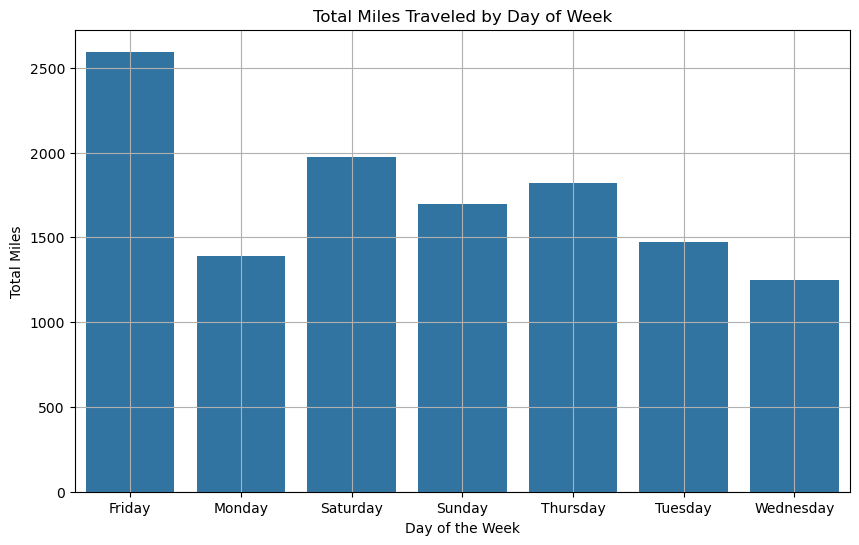

In [68]:
day_miles = uber_data.groupby('START_DATE_DAY')['MILES'].sum()
plt.figure(figsize=(10, 6))
sns.barplot(x=day_miles.index, y=day_miles.values)
plt.title('Total Miles Traveled by Day of Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Miles')
plt.grid(True)
plt.show()


## 6. Start vs End Time Period


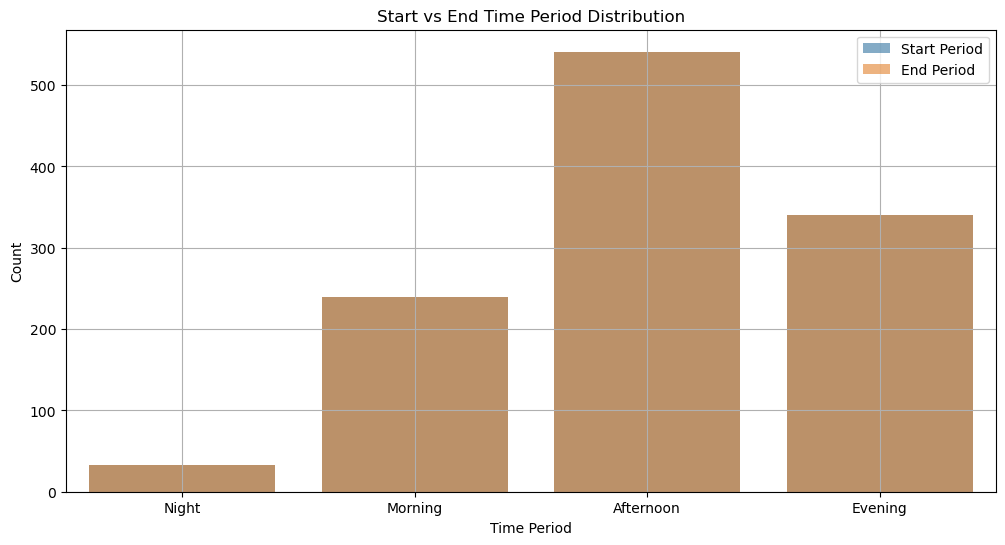

In [69]:
start_period_count = uber_data['START_TIME_PERDIOD'].value_counts()
end_period_count = uber_data['END_TIME_PERDIOD'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=start_period_count.index, y=start_period_count.values, alpha=0.6, label="Start Period")
sns.barplot(x=end_period_count.index, y=end_period_count.values, alpha=0.6, label="End Period")
plt.title('Start vs End Time Period Distribution')
plt.xlabel('Time Period')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()


## 7.Average Trip Duration by Hour of Day

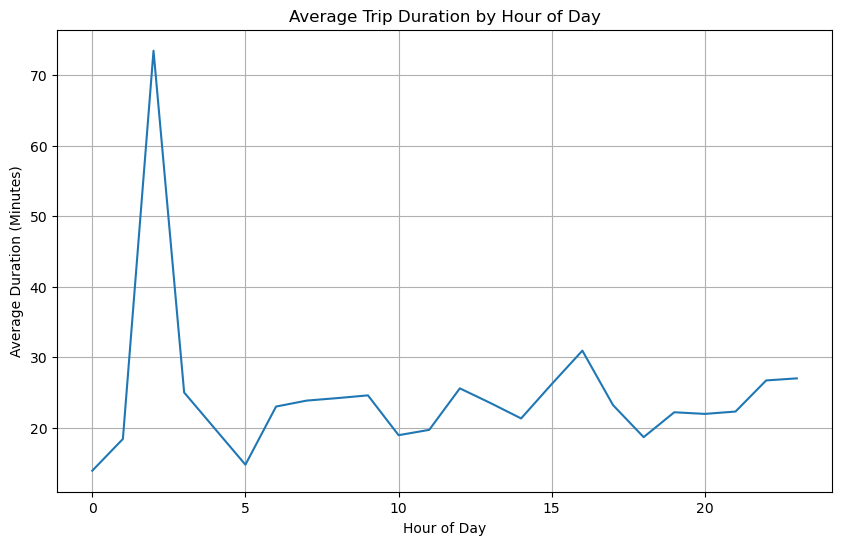

In [70]:
hourly_duration = uber_data.groupby('START_DATE_Hour')['DURATION'].mean()
plt.figure(figsize=(10, 6))
sns.lineplot(x=hourly_duration.index, y=hourly_duration.values)
plt.title('Average Trip Duration by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Duration (Minutes)')
plt.grid(True)
plt.show()

Dataset Columns:
Index(['MILES', 'START_DATE_Year', 'START_DATE_Hour', 'START_DATE_Minute',
       'END_DATE_Year', 'END_DATE_Hour', 'END_DATE_Minute', 'DURATION',
       'CATEGORY_Business', 'CATEGORY_Personal',
       ...
       'END_DATE_Month_October', 'END_DATE_Month_September',
       'START_TIME_PERDIOD_Night', 'START_TIME_PERDIOD_Morning',
       'START_TIME_PERDIOD_Afternoon', 'START_TIME_PERDIOD_Evening',
       'END_TIME_PERDIOD_Night', 'END_TIME_PERDIOD_Morning',
       'END_TIME_PERDIOD_Afternoon', 'END_TIME_PERDIOD_Evening'],
      dtype='object', length=432)


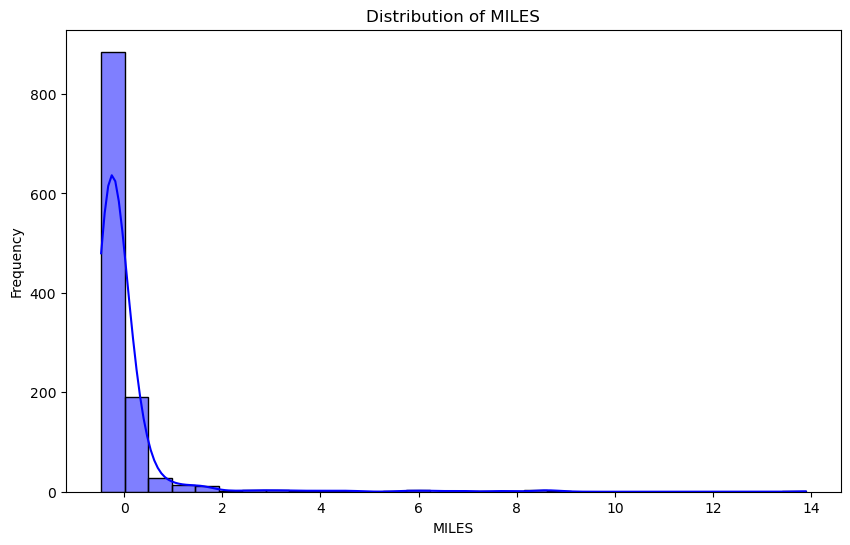

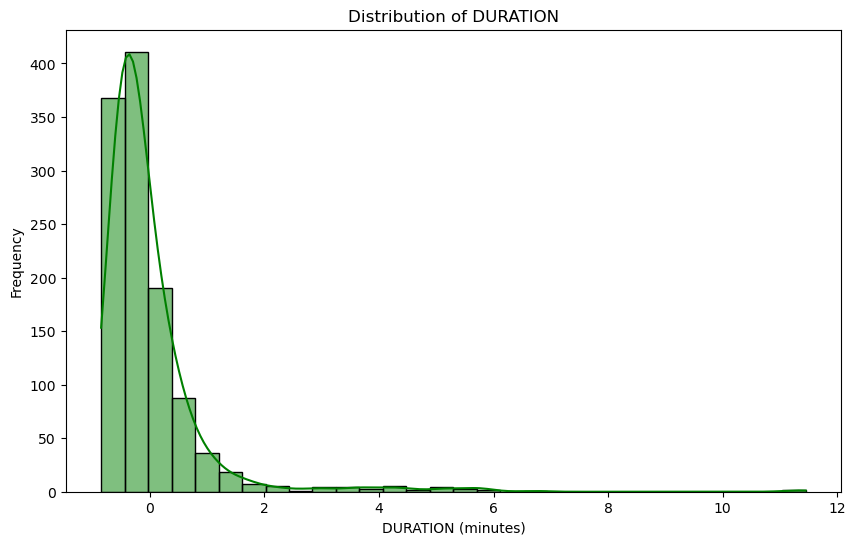

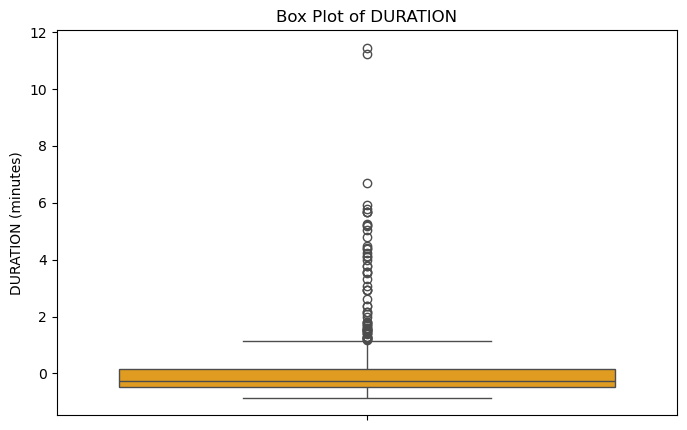

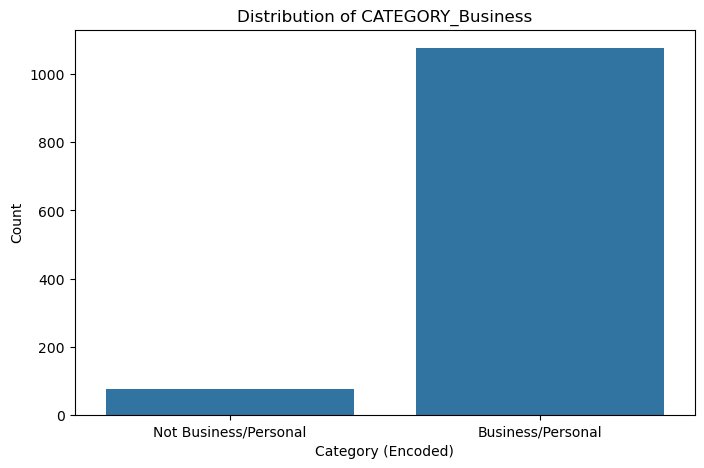

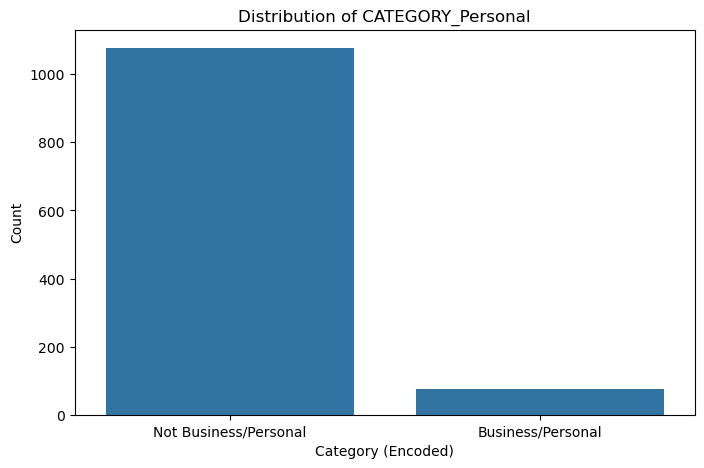

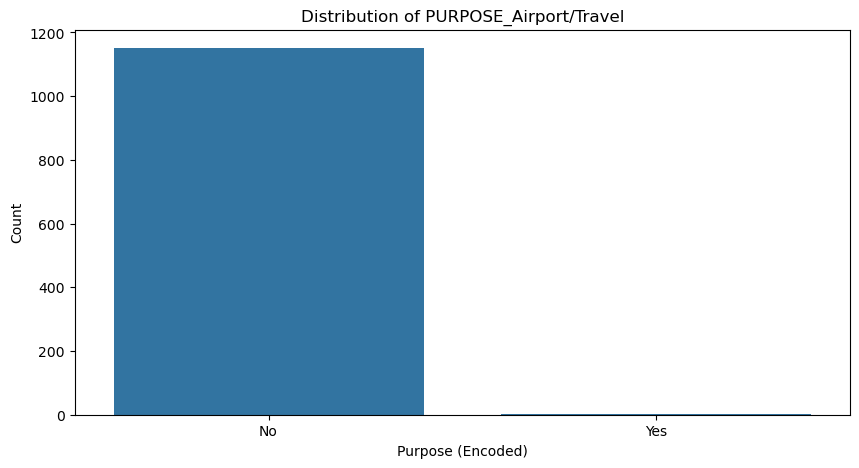

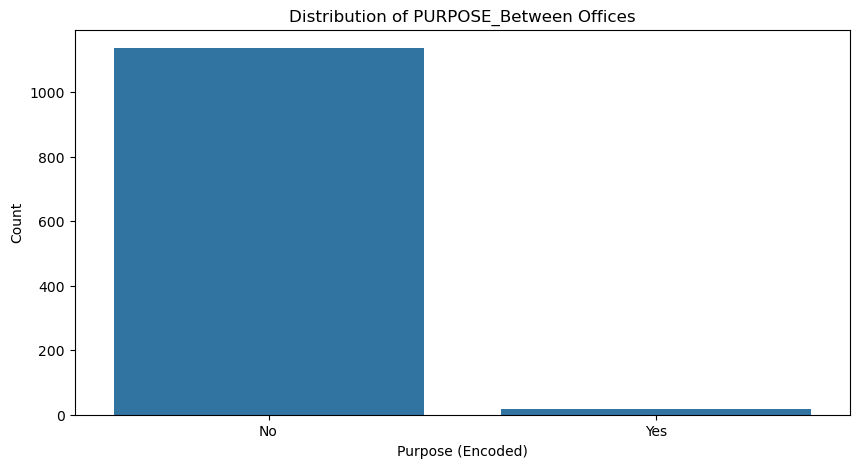

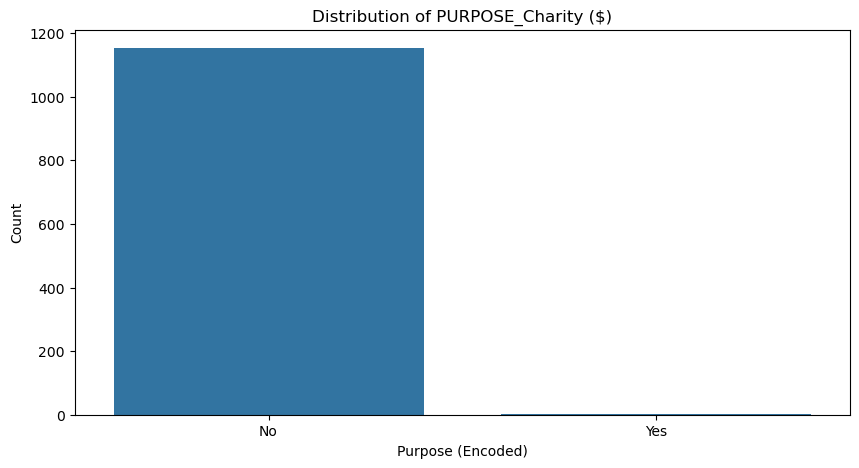

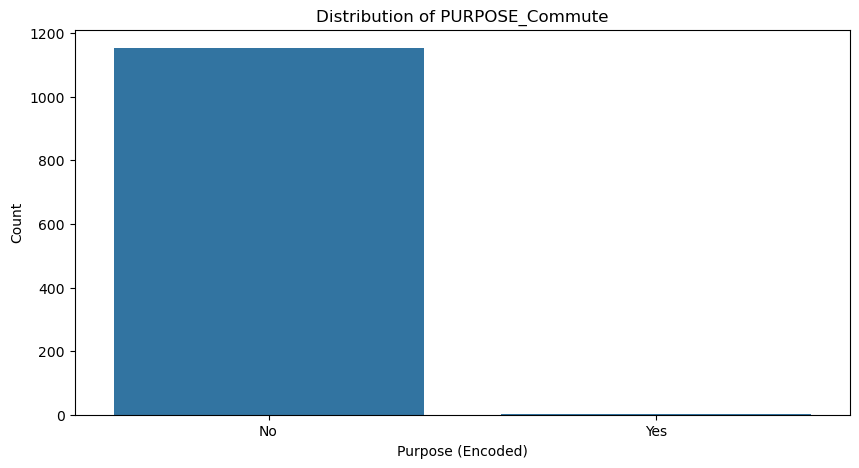

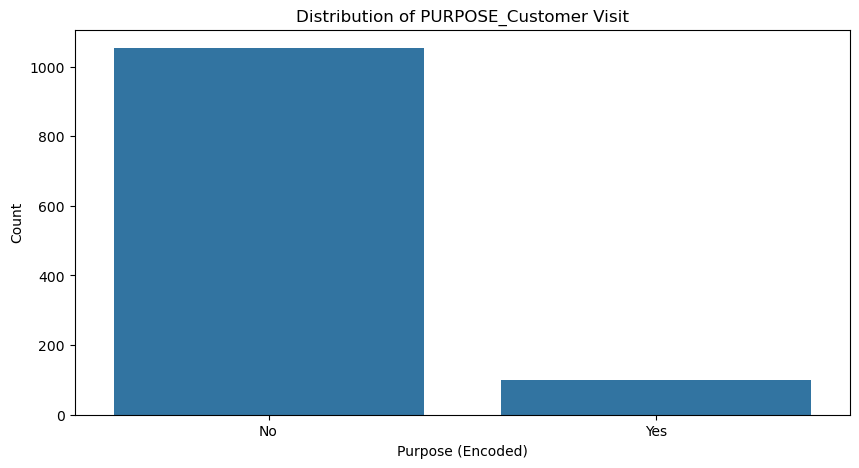

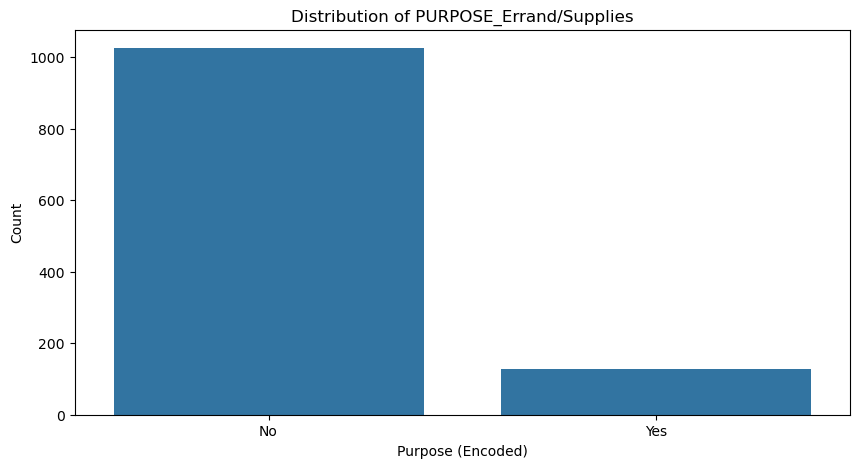

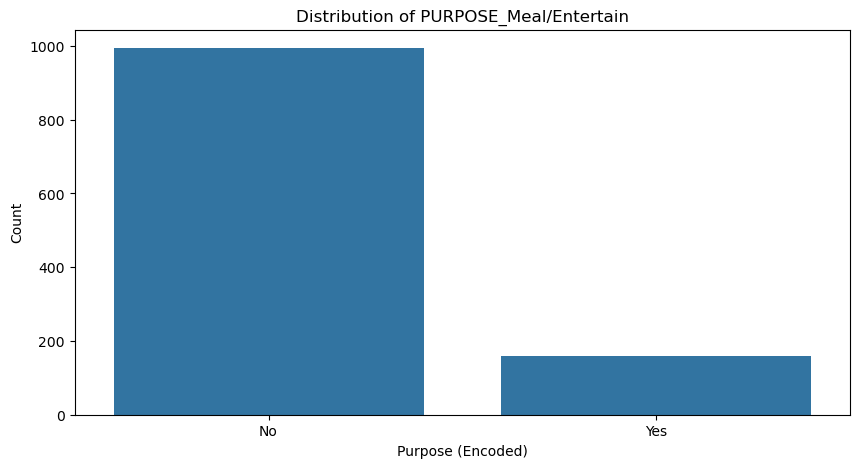

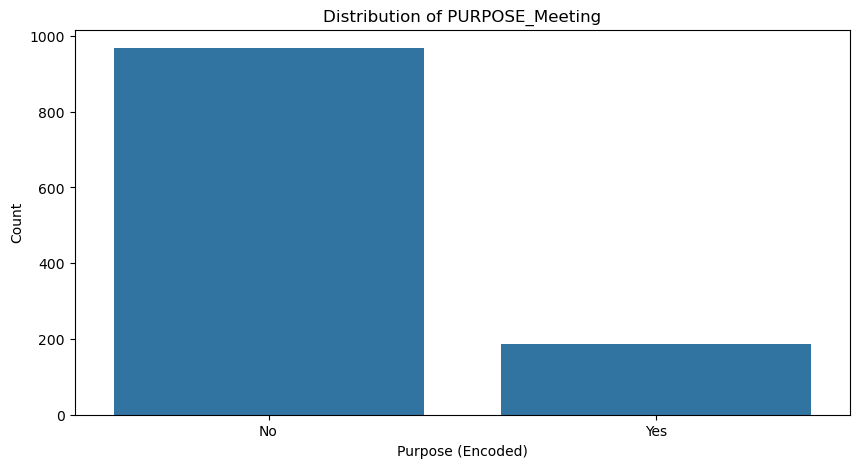

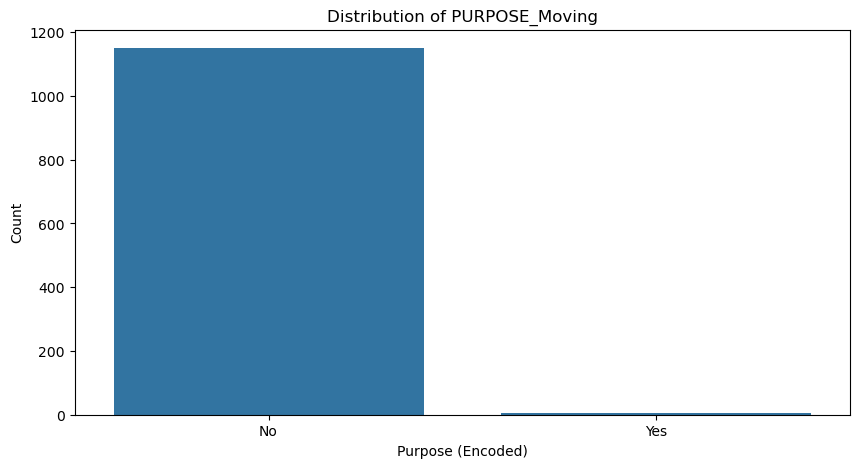

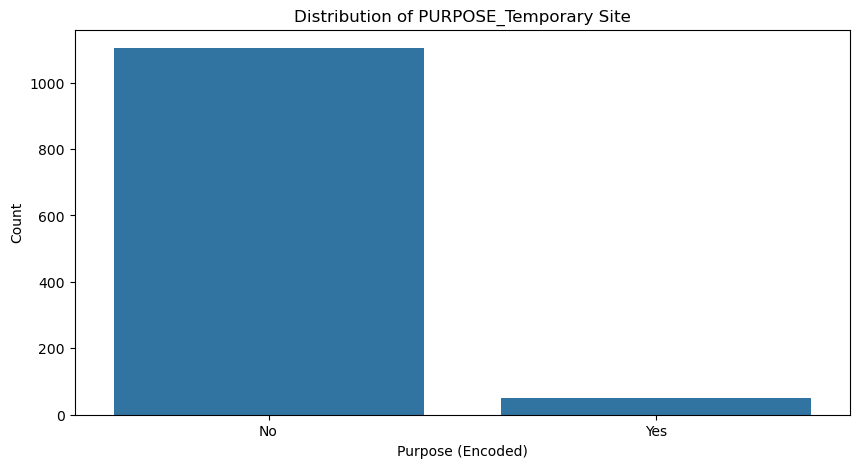

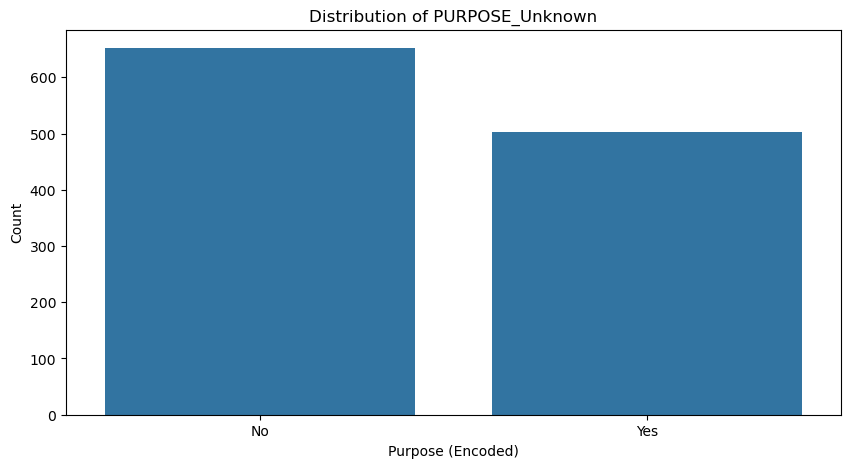

START Location Distribution:


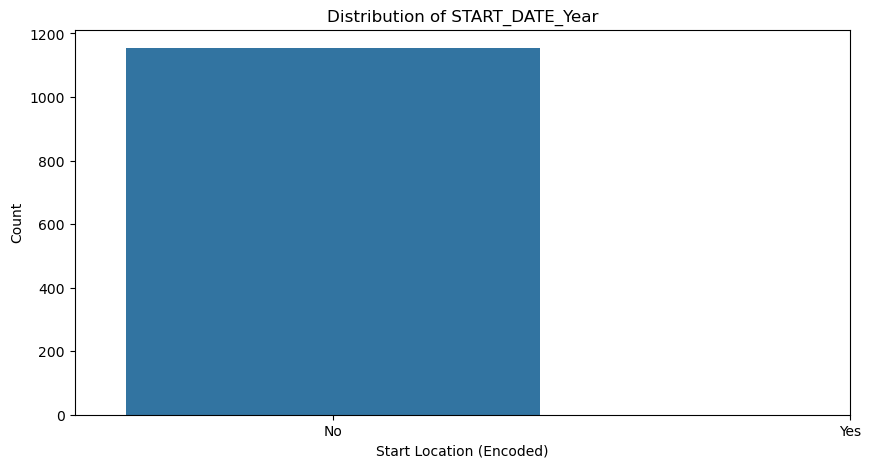

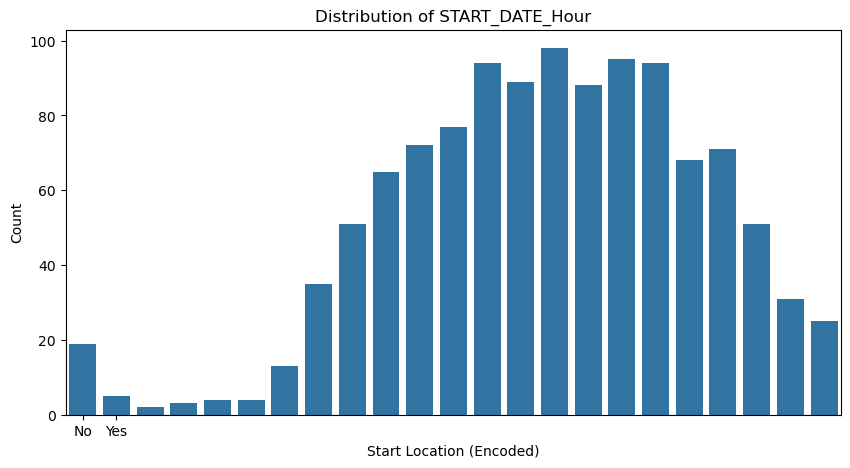

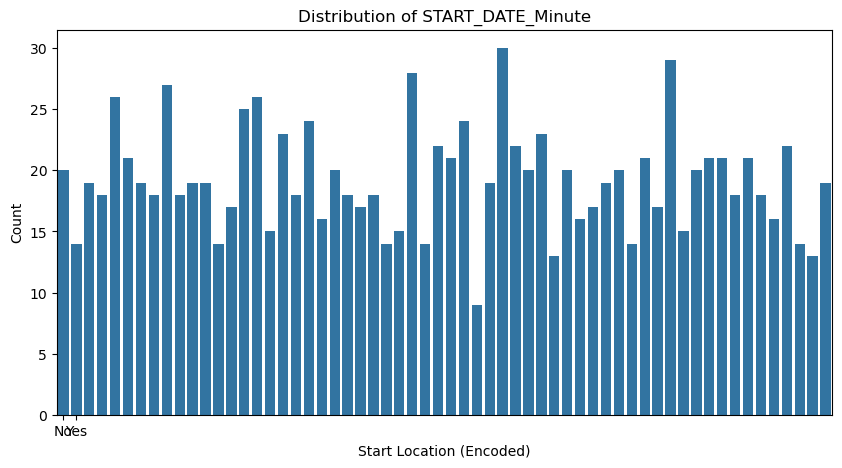

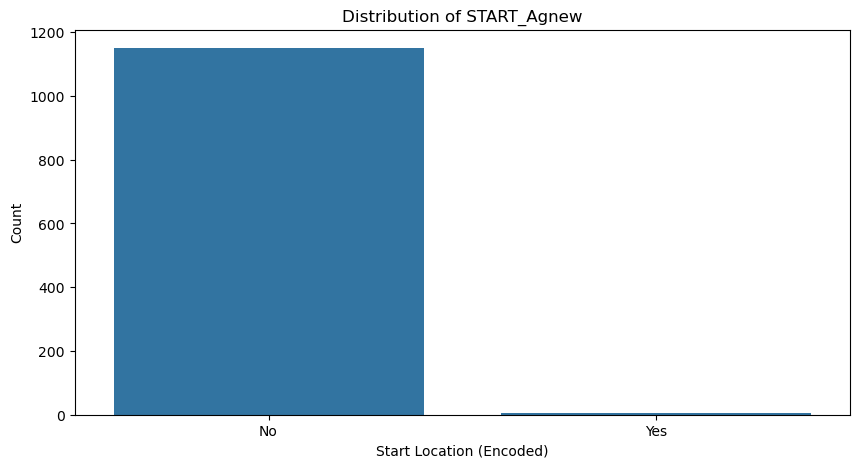

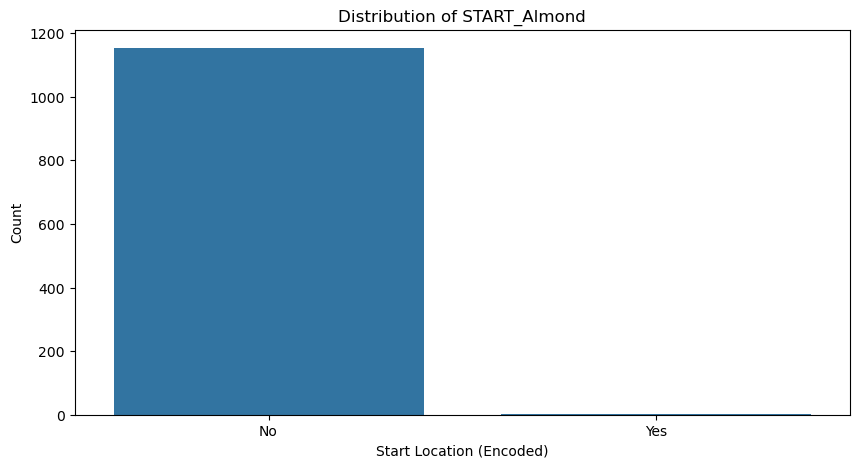

STOP Location Distribution:


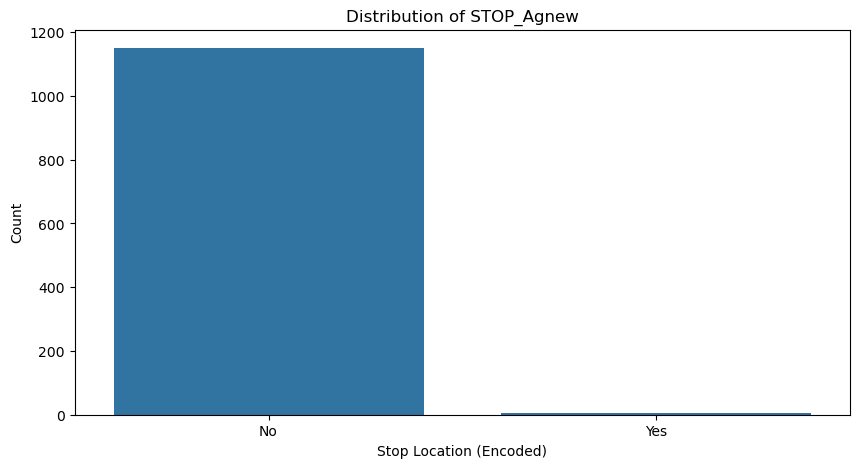

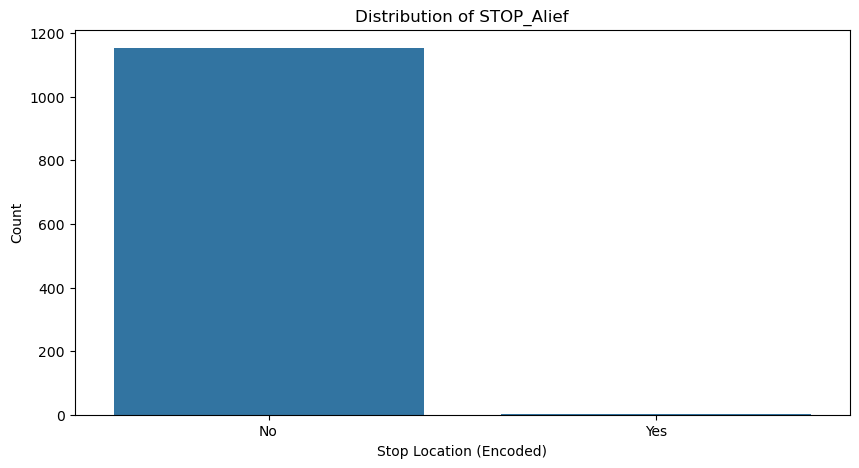

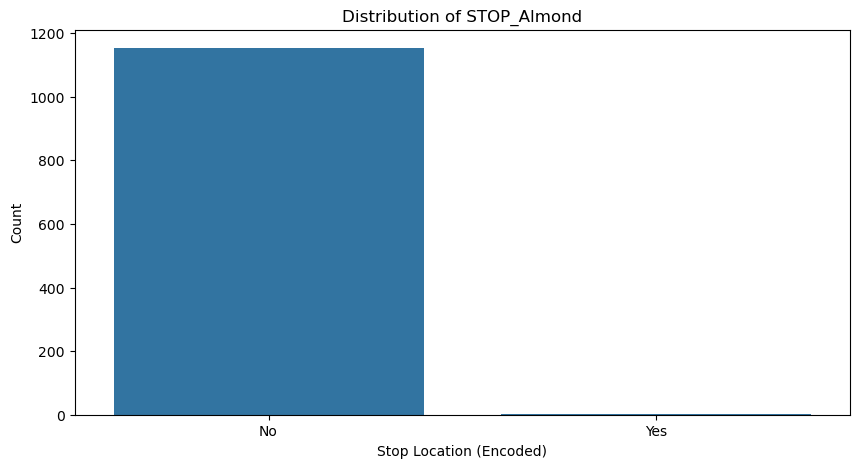

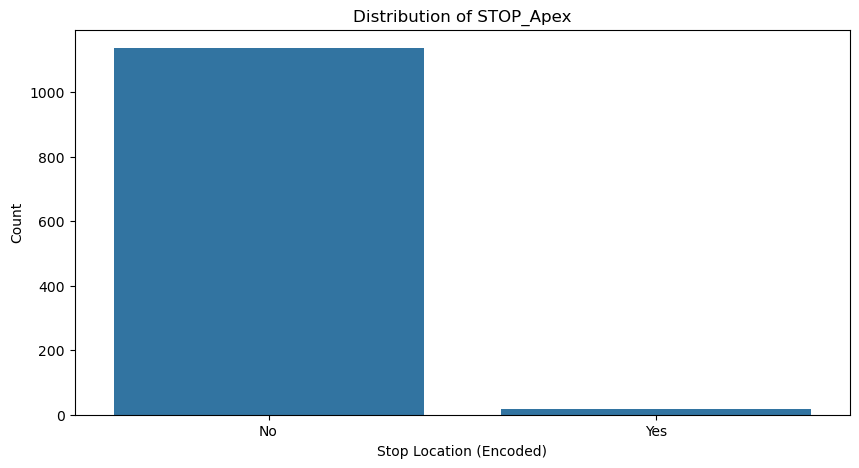

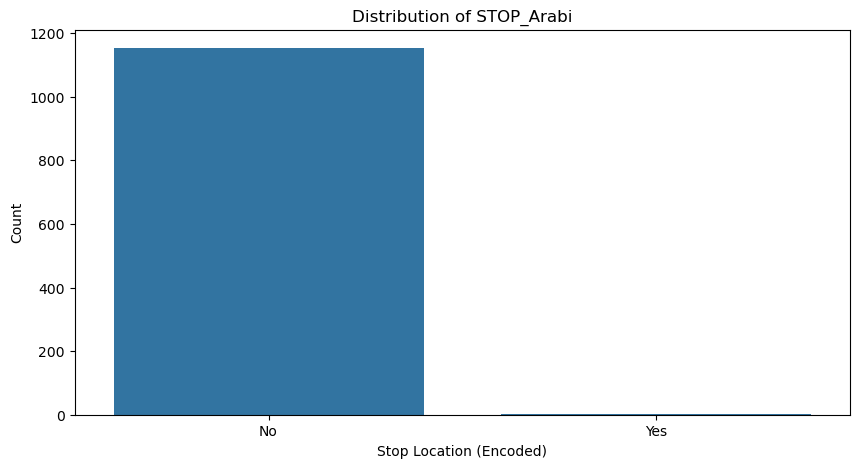

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

# Verify dataset columns to identify numerical and categorical features
print("Dataset Columns:")
print(uber_data_encoded.columns)

# 1. Visualize Numerical Features

# Distribution of MILES
plt.figure(figsize=(10, 6))
sns.histplot(data=uber_data_encoded, x='MILES', kde=True, bins=30, color='blue')
plt.title('Distribution of MILES')
plt.xlabel('MILES')
plt.ylabel('Frequency')
plt.show()

# Distribution of DURATION
plt.figure(figsize=(10, 6))
sns.histplot(data=uber_data_encoded, x='DURATION', kde=True, bins=30, color='green')
plt.title('Distribution of DURATION')
plt.xlabel('DURATION (minutes)')
plt.ylabel('Frequency')
plt.show()

# Box Plot for DURATION
plt.figure(figsize=(8, 5))
sns.boxplot(data=uber_data_encoded, y='DURATION', color='orange')
plt.title('Box Plot of DURATION')
plt.ylabel('DURATION (minutes)')
plt.show()

# 2. Visualize Encoded Categorical Features

# Identify CATEGORY-related columns (e.g., CATEGORY_Business)
category_columns = [col for col in uber_data_encoded.columns if col.startswith('CATEGORY_')]

# Plot for CATEGORY-related columns
if category_columns:
    for category_column in category_columns:
        plt.figure(figsize=(8, 5))
        sns.countplot(x=uber_data_encoded[category_column])
        plt.title(f'Distribution of {category_column}')
        plt.xlabel('Category (Encoded)')
        plt.ylabel('Count')
        plt.xticks([0, 1], ['Not Business/Personal', 'Business/Personal'])
        plt.show()
else:
    print("No CATEGORY-related columns found.")

# Identify PURPOSE-related columns (e.g., PURPOSE_Meeting)
purpose_columns = [col for col in uber_data_encoded.columns if col.startswith('PURPOSE_')]

# Plot for PURPOSE-related columns
if purpose_columns:
    for purpose_column in purpose_columns:
        plt.figure(figsize=(10, 5))
        sns.countplot(x=uber_data_encoded[purpose_column])
        plt.title(f'Distribution of {purpose_column}')
        plt.xlabel('Purpose (Encoded)')
        plt.ylabel('Count')
        plt.xticks([0, 1], ['No', 'Yes'])
        plt.show()
else:
    print("No PURPOSE-related columns found.")

# 3. Visualize START and STOP Locations

# Identify START and STOP columns
start_columns = [col for col in uber_data_encoded.columns if col.startswith('START_')]
stop_columns = [col for col in uber_data_encoded.columns if col.startswith('STOP_')]

# Plot for START-related columns
if start_columns:
    print("START Location Distribution:")
    for start_column in start_columns[:5]:  # Limit to first 5 for visualization
        plt.figure(figsize=(10, 5))
        sns.countplot(x=uber_data_encoded[start_column])
        plt.title(f'Distribution of {start_column}')
        plt.xlabel('Start Location (Encoded)')
        plt.ylabel('Count')
        plt.xticks([0, 1], ['No', 'Yes'])
        plt.show()
else:
    print("No START-related columns found.")

# Plot for STOP-related columns
if stop_columns:
    print("STOP Location Distribution:")
    for stop_column in stop_columns[:5]:  # Limit to first 5 for visualization
        plt.figure(figsize=(10, 5))
        sns.countplot(x=uber_data_encoded[stop_column])
        plt.title(f'Distribution of {stop_column}')
        plt.xlabel('Stop Location (Encoded)')
        plt.ylabel('Count')
        plt.xticks([0, 1], ['No', 'Yes'])
        plt.show()
else:
    print("No STOP-related columns found.")


# 22. Feature Importance Visualization

C:\Users\fares\AppData\Local\Temp\ipykernel_12560\486882586.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df.head(10), x='Importance', y='Feature', palette='viridis')


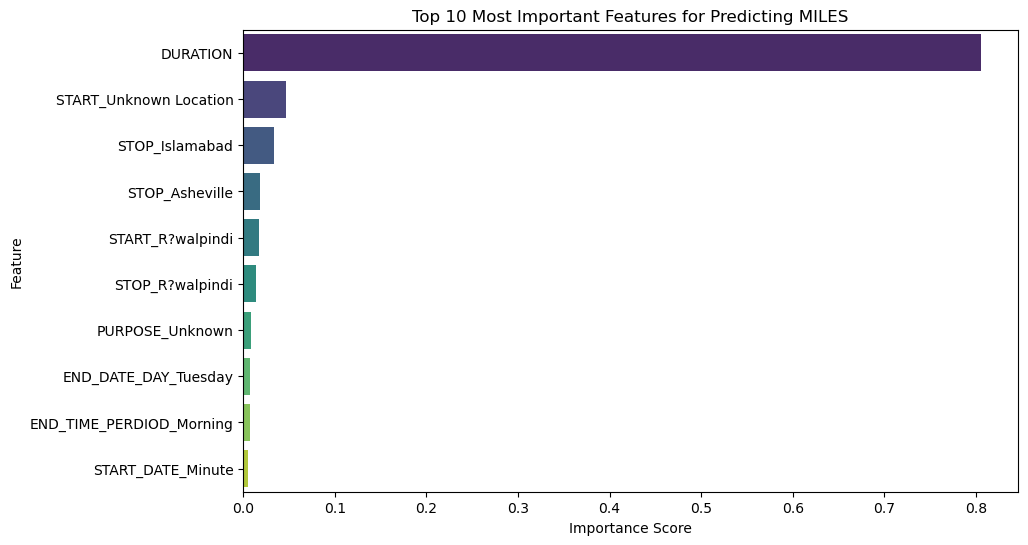

In [72]:
import pandas as pd

# Extract feature importances from the best Gradient Boosting Regressor
feature_importances = best_gbr.feature_importances_

# Create a DataFrame to organize feature names and their importance scores
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort features by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the top 10 most important features
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df.head(10), x='Importance', y='Feature', palette='viridis')
plt.title('Top 10 Most Important Features for Predicting MILES')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()


# 23.	Model Performance Across Features

In [73]:
# Define feature groups
time_features = [col for col in uber_data_encoded.columns if 'START_DATE_' in col or 'END_DATE_' in col or col == 'DURATION']
category_features = [col for col in uber_data_encoded.columns if col.startswith('CATEGORY_') or col.startswith('PURPOSE_')]
location_features = [col for col in uber_data_encoded.columns if col.startswith('START_') or col.startswith('STOP_')]

feature_groups = {
    'Time-Based Features': time_features,
    'Categorical Features': category_features,
    'Location Features': location_features
}

# Evaluate performance for each feature group
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

group_performance = {}

for group_name, features in feature_groups.items():
    # Train-test split for the feature group
    X_train_group = X_train[features]
    X_test_group = X_test[features]
    
    # Train the Gradient Boosting Regressor on this group
    model = GradientBoostingRegressor(random_state=0)
    model.fit(X_train_group, y_train)
    
    # Predict and evaluate
    y_pred_group = model.predict(X_test_group)
    mae = mean_absolute_error(y_test, y_pred_group)
    mse = mean_squared_error(y_test, y_pred_group)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred_group)
    
    # Store performance
    group_performance[group_name] = {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R² Score': r2
    }

# Print performance across feature groups
print("\nModel Performance Across Feature Groups:")
for group_name, metrics in group_performance.items():
    print(f"\n{group_name}:")
    for metric_name, value in metrics.items():
        print(f"  {metric_name}: {value:.4f}")



Model Performance Across Feature Groups:

Time-Based Features:
  MAE: 0.2509
  MSE: 0.4631
  RMSE: 0.6805
  R² Score: 0.7764

Categorical Features:
  MAE: 0.4844
  MSE: 1.9953
  RMSE: 1.4126
  R² Score: 0.0363

Location Features:
  MAE: 0.4797
  MSE: 1.9858
  RMSE: 1.4092
  R² Score: 0.0409
